In [39]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [42]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [43]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [44]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

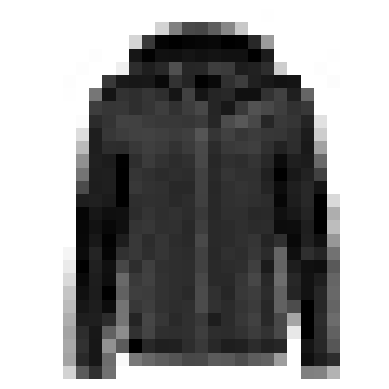

In [45]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [46]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [47]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

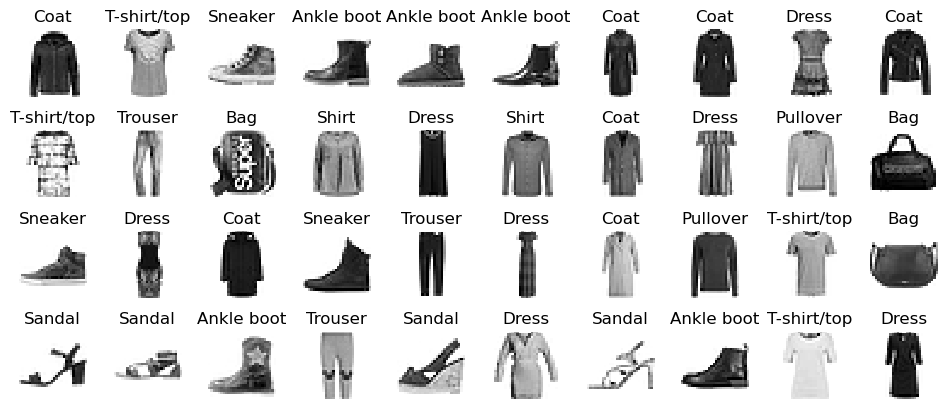

In [48]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [49]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 32)         

In [63]:
hidden1 = model.layers[1]
hidden2 = model.layers[0]
hidden1.name

weights = hidden1.get_weights()
biases = hidden2.get_weights()

In [64]:
weights

[]

In [65]:
print(weights.shape)

AttributeError: 'list' object has no attribute 'shape'

In [66]:
biases

[array([[[[ 0.13193655, -0.01040685,  0.03653033,  0.05346355,
            0.08107868,  0.02359045,  0.03242107, -0.09168176,
            0.05480152, -0.13942711, -0.04904077, -0.05293617,
           -0.00528716,  0.10390881, -0.06040139,  0.00463226,
            0.08263402, -0.03069069,  0.10930502, -0.11816421,
            0.0580804 ,  0.06880319,  0.14721969,  0.03539442,
            0.04295087,  0.14132479, -0.13008733,  0.01174685,
            0.12845784,  0.12668273,  0.01529683, -0.05435619,
            0.06252705, -0.13206363,  0.05583733, -0.14391533,
            0.11356437, -0.07282893, -0.09220946,  0.09057109,
            0.07893528,  0.10825813,  0.12032905,  0.02006528,
           -0.04301842,  0.07507277,  0.05577333,  0.03206167,
           -0.11274797, -0.11687179, -0.02846623, -0.1233559 ,
           -0.08803366, -0.1140389 , -0.07953024, -0.00786816,
           -0.09954785, -0.03791503,  0.08853692, -0.11814639,
           -0.00209139,  0.14177847, -0.01595503, -0.07

In [67]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [68]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [70]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')
history = model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 48s 55ms/step - loss: 1.3807 - accuracy: 0.4809 - val_loss: 0.8112 - val_accuracy: 0.7030
Epoch 2/10
860/860 [==============================] - 52s 61ms/step - loss: 0.8704 - accuracy: 0.6632 - val_loss: 0.7023 - val_accuracy: 0.7542
Epoch 3/10
860/860 [==============================] - 50s 58ms/step - loss: 0.7825 - accuracy: 0.6981 - val_loss: 0.6504 - val_accuracy: 0.7462
Epoch 4/10
860/860 [==============================] - 51s 59ms/step - loss: 0.7322 - accuracy: 0.7190 - val_loss: 0.6119 - val_accuracy: 0.7730
Epoch 5/10
860/860 [==============================] - 53s 61ms/step - loss: 0.6929 - accuracy: 0.7345 - val_loss: 0.5697 - val_accuracy: 0.8008
Epoch 6/10
860/860 [==============================] - 49s 57ms/step - loss: 0.6615 - accuracy: 0.7460 - val_loss: 0.5476 - val_accuracy: 0.8024
Epoch 7/10
860/860 [==============================] - 50s 58ms/step - loss: 0.6279 - accuracy: 0.7611 - val_loss: 0.5244 - val_accuracy:

In [71]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 860}

In [72]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [73]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

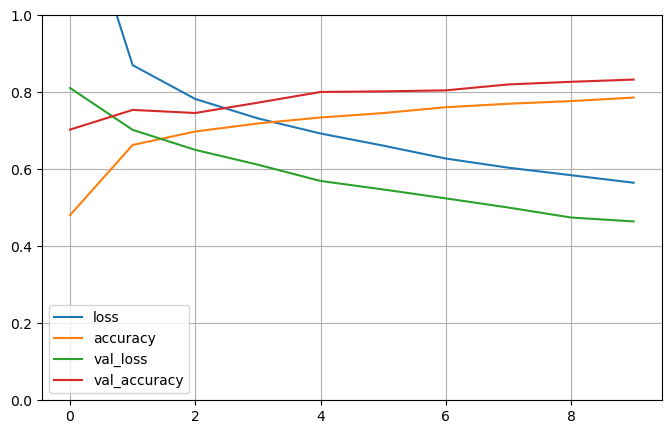

In [74]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [75]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.4916 - accuracy: 0.8187


[0.4916020929813385, 0.8187000155448914]

In [76]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 120ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.25, 0.  , 0.72],
       [0.  , 0.  , 0.85, 0.  , 0.07, 0.  , 0.07, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [77]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [78]:
np.array(class_names)[y_pred]

NameError: name 'y_pred' is not defined

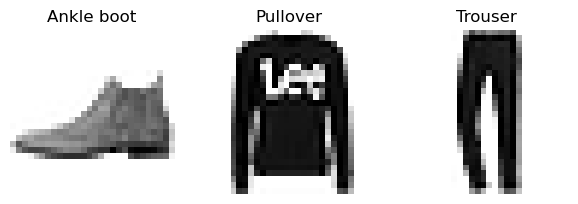

In [79]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()